In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
# nltk.download('vader_lexicon')

In [3]:
#CREATING REDDIT CLIENT
#!pip install praw

import praw

reddit = praw.Reddit(client_id='oLe97_EN7PNcdQu_lPDcwA',              #put your reddit's client_id here
                     client_secret='RLqg9MqENxy96YD7N3BQQSS19-Luig',          #put your reddit's client_secret here
                     user_agent='Mayank')             #put your reddit's username here

In [4]:
#set for our headlines to avoid duplicates when running multiple times
headlines = set()
headlines_left = set()
headlines_right = set()

#iterate through /r/LabourUK subreddit using the API client:
for submission in reddit.subreddit('LabourUK').new(limit=5000):
    headlines_left.add(submission.title)
    display.clear_output()
    print(len(headlines_left))

#iterate through /r/tories subreddit using the API client:
for submission in reddit.subreddit('tories').new(limit=5000):
    headlines_right.add(submission.title)
    display.clear_output()
    #print(len(headlines_right))

In [5]:
#Taking a Union of both headlines sets - LabourUK as well as tories
headlines = headlines_left.union(headlines_right)
headlines

{'Angela Rayner: In 2012 @DominicRaab said: “People who are coasting - it should be easier to let them go, to give the unemployed a chance.” It’s time he took his own advice and resigned.',
 'Is the UK Government currently taking the right measures to address the coronavirus pandemic? (2 Aug) Yes: 40% (+11) No: 42% (-11) Don’t know: 18% (–) Changes +/- 25 July',
 "World's strictest headmistress, Conservative Katharine Birbalsingh tears woke culture apart",
 'Westminster voting intention: CON: 41% (+1) LAB: 34% (-1) LDEM: 8% (-1) GRN: 5% (-1) via @SavantaComRes , 16 - 18 Jul Chgs. w/ 11 Jul',
 'National security is threatened when politics is in thrall to cash | Opinion Peice | Guardian | Nick Cohen',
 'NHS waiting list could soar to 14 million in England next year, report warns',
 'Rise of populism down to failure of mainstream politics, says Ed Milband',
 'Pre-election, Scots were divided over Scottish Government’s course of action if UK Government refuses a second referendum',
 'Tali

In [6]:
#headlines = set.union(headlines_left, headlines_right)
df_hl = pd.DataFrame(headlines_left)
df_hr = pd.DataFrame(headlines_right)
df_hl['label'] = 0    #LabourUK labelled as 0
df_hr['label'] = 1    #tories labelled as 1
df_hl.rename(columns={0:'headline'}, inplace= True)
df_hr.rename(columns={0:'headline'}, inplace= True)
df = pd.concat([df_hl, df_hr], axis=0) #concatenating leftwing as well as rightwing dfs into single df
df

,headline,label
0,Angela Rayner: In 2012 @DominicRaab said: “Peo...,0
1,SNAP POLL: Britons are split 44% to 43% on rai...,0
2,"Tripartism, American Style: The Past and Futur...",0
3,"Richard Johnson: In December 1981, a delegatio...",0
4,It’s time for those who benefited from a housi...,0
...,...,...
978,What kind of Conservative would you guys ident...,1
979,"Conservatives, what is your opinion on Preside...",1
980,Soldiers confronted for scrubbing graffiti off...,1
981,What policy area is most important to you?,1


In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.2023,
  'headline': 'Angela Rayner: In 2012 @DominicRaab said: “People who are coasting - it should be '
              'easier to let them go, to give the unemployed a chance.” It’s time he took his own '
              'advice and resigned.',
  'neg': 0.057,
  'neu': 0.862,
  'pos': 0.08},
 {'compound': 0.128,
  'headline': 'Is the UK Government currently taking the right measures to address the coronavirus '
              'pandemic? (2 Aug) Yes: 40% (+11) No: 42% (-11) Don’t know: 18% (–) Changes +/- 25 '
              'July',
  'neg': 0.067,
  'neu': 0.851,
  'pos': 0.082},
 {'compound': -0.2263,
  'headline': "World's strictest headmistress, Conservative Katharine Birbalsingh tears woke "
              'culture apart',
  'neg': 0.174,
  'neu': 0.826,
  'pos': 0.0}]


In [8]:
df1 = pd.DataFrame.from_records(results)
df1

,neg,neu,pos,compound,headline
0,0.057,0.862,0.080,0.2023,Angela Rayner: In 2012 @DominicRaab said: “Peo...
1,0.067,0.851,0.082,0.1280,Is the UK Government currently taking the righ...
2,0.174,0.826,0.000,-0.2263,"World's strictest headmistress, Conservative K..."
3,0.000,1.000,0.000,0.0000,Westminster voting intention: CON: 41% (+1) LA...
4,0.155,0.722,0.124,-0.1531,National security is threatened when politics ...
...,...,...,...,...,...
1949,0.153,0.847,0.000,-0.2023,'Levelling up': how an empty slogan could be m...
1950,0.000,1.000,0.000,0.0000,What kind of Conservative would you guys ident...
1951,0.213,0.651,0.136,-0.3182,Can we ban corporations from buying residentia...
1952,0.000,0.770,0.230,0.2716,What policy area is most important to you?


In [9]:
#Nature indicates whether the statement is positive negative or neutral
df1['Nature'] = 0
df1.loc[df1['compound'] > 0.2, 'Nature'] = 1
df1.loc[df1['compound'] < -0.2, 'Nature'] = -1
df1.head()

,neg,neu,pos,compound,headline,Nature
0,0.057,0.862,0.080,0.2023,Angela Rayner: In 2012 @DominicRaab said: “Peo...,1
1,0.067,0.851,0.082,0.1280,Is the UK Government currently taking the righ...,0
2,0.174,0.826,0.000,-0.2263,"World's strictest headmistress, Conservative K...",-1
3,0.000,1.000,0.000,0.0000,Westminster voting intention: CON: 41% (+1) LA...,0
4,0.155,0.722,0.124,-0.1531,National security is threatened when politics ...,0


In [10]:
df2 = pd.merge(df, df1, how = "inner", on = "headline", sort=True)

In [11]:
df2

,headline,label,neg,neu,pos,compound,Nature
0,"""...a new in-depth military alliance made up o...",0,0.000,1.000,0.000,0.0000,0
1,"""5 things to know about German conservatives’ ...",1,0.000,1.000,0.000,0.0000,0
2,"""Ahmad"" is gay. He has spent 8 months in deten...",0,0.062,0.938,0.000,-0.3612,-1
3,"""Anas Sarwar - Loses Seats - ""Really turning t...",0,0.090,0.743,0.167,0.4559,1
4,"""Anas Sarwar was Keir Starmer's choice for Sco...",0,0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...,...,...
1966,"🚨 | NEW: Joe Biden on Cuba: ""Communism is a fa...",1,0.246,0.634,0.119,-0.5279,-1
1967,🚨 | NEW: Sir Keir Starmer does not support a N...,0,0.223,0.777,0.000,-0.5975,-1
1968,🚨Exclusive Ethnic Minority Voting Intention Po...,1,0.000,1.000,0.000,0.0000,0
1969,🚨Savanta ComRes NEW Westminster Voting Intenti...,0,0.065,0.879,0.055,-0.1027,0


In [12]:
#df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)


In [13]:
print("Positive headlines:\n")
pprint(list(df2[df2['Nature'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df2[df2['Nature'] == -1].headline)[:5], width=200)

print("\nNeutral headlines:\n")
pprint(list(df2[df2['Nature'] == 0].headline)[:5], width=200)

Positive headlines:

['"Anas Sarwar - Loses Seats - "Really turning things around for Scottish Labour!" Mark Drakeford - Wins Seats - "Mr Chairman of the Trot Jamboree!"',
 '"Representative democracy should as far as possible be abolished in the Party" ~ David Evans, 1998.',
 '"We are in favour of common ownership absolutely... Starmer said this in the leadership campaign - we haven\'t changed that commitment." - Shadow business secretary Ed Miliband on Labour '
 'supporting public ownership of energy, water and transport. @Ed_Miliband | #Newsnight',
 '"With Sharon Graham winning the Unite leadership contest it’s worth returning to this @novaramedia show from 2017 with labour organiser/theorist Jane McAlevey. The organising approach discussed '
 'here will likely be the direction of the union." | Aaron Bastani on Twitter',
 '"lol yesterday keir starmer said in response to my boyfriends question about transphobia that ‘it would be stamped out as soon as it was spotted’ ... rosie duffiel

In [14]:
print(df2.label.value_counts())

print(df2.label.value_counts(normalize=True) * 100)

0    988
1    983
Name: label, dtype: int64
0    50.126839
1    49.873161
Name: label, dtype: float64


In [15]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

# print(word_tokenize(example, language='english'))

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/SaiKiran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/SaiKiran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [20]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [21]:
#Finding most common words in tories
pos_lines_r = list(df2[df2.label == 1].headline)

pos_tokens_r = process_text(pos_lines_r)
pos_freq_r = nltk.FreqDist(pos_tokens_r)

pos_freq_r.most_common(20)

[('uk', 120),
 ('1', 112),
 ('labour', 88),
 ('boris', 79),
 ('johnson', 77),
 ('2', 64),
 ('conservative', 50),
 ('tory', 49),
 ('party', 45),
 ('5', 41),
 ('news', 39),
 ('government', 39),
 ('lab', 38),
 ('new', 38),
 ('voting', 38),
 ('con', 36),
 ('britain', 35),
 ('6', 34),
 ('would', 33),
 ('mp', 32)]

In [22]:
#Finding most common words in LabourUK
pos_lines_l = list(df2[df2.label == 0].headline)

pos_tokens_l = process_text(pos_lines_l)
pos_freq_l = nltk.FreqDist(pos_tokens_l)

pos_freq_l.most_common(20)

[('labour', 268),
 ('twitter', 101),
 ('starmer', 100),
 ('party', 90),
 ('1', 80),
 ('afghanistan', 75),
 ('keir', 69),
 ('uk', 66),
 ('new', 64),
 ('people', 55),
 ('taliban', 53),
 ('left', 50),
 ('2', 49),
 ('would', 47),
 ('3', 43),
 ('unite', 42),
 ('tax', 39),
 ('election', 39),
 ('care', 38),
 ('government', 38)]

In [23]:
df_dat = df2[['headline', 'Nature', 'label']]

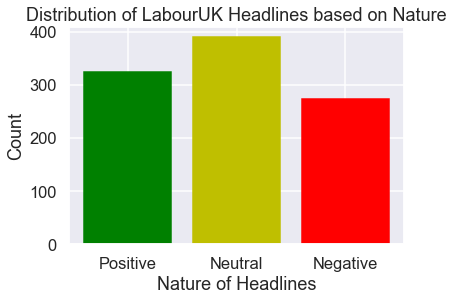

In [24]:
#Visualizing Distribution of LabourUK Headlines based on Nature
count_lpos_hl = len(df_dat.loc[(df_dat['label']==0) & (df_dat['Nature']==1)].headline)
count_lneu_hl = len(df_dat.loc[(df_dat['label']==0) & (df_dat['Nature']==0)].headline)
count_lneg_hl = len(df_dat.loc[(df_dat['label']==0) & (df_dat['Nature']==-1)].headline)
count_lhl = [count_lpos_hl, count_lneu_hl, count_lneg_hl]
x = ['Positive', 'Neutral', 'Negative']
barlist = plt.bar(x, count_lhl)
plt.ylabel('Count')
plt.xlabel('Nature of Headlines')
plt.title('Distribution of LabourUK Headlines based on Nature')
barlist[0].set_color('g')
barlist[1].set_color('y')
barlist[2].set_color('r')
plt.show()

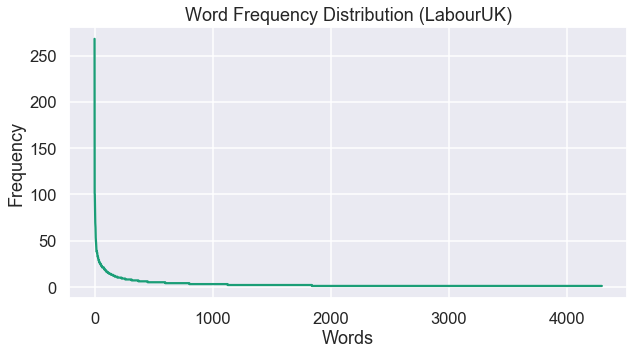

In [25]:
y_val = [x[1] for x in pos_freq_l.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (LabourUK)")
plt.show()

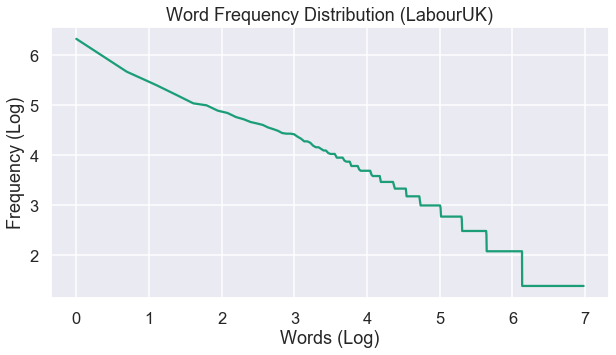

In [26]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (LabourUK)")
plt.plot(x_val, y_final)
plt.show()

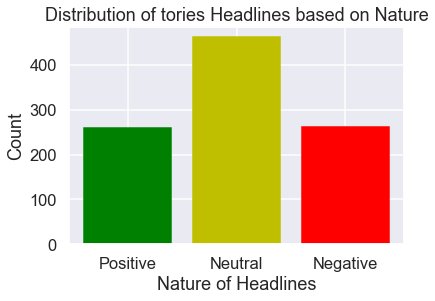

In [27]:
#Visualizing Distribution of tories Headlines based on Nature
count_rpos_hl = len(df_dat.loc[(df_dat['label']==1) & (df_dat['Nature']==1)].headline)
count_rneu_hl = len(df_dat.loc[(df_dat['label']==1) & (df_dat['Nature']==0)].headline)
count_rneg_hl = len(df_dat.loc[(df_dat['label']==1) & (df_dat['Nature']==-1)].headline)
count_rhl = [count_rpos_hl, count_rneu_hl, count_rneg_hl]
x = ['Positive', 'Neutral', 'Negative']
barlist = plt.bar(x, count_rhl)
plt.ylabel('Count')
plt.xlabel('Nature of Headlines')
plt.title('Distribution of tories Headlines based on Nature')
barlist[0].set_color('g')
barlist[1].set_color('y')
barlist[2].set_color('r')
plt.show()

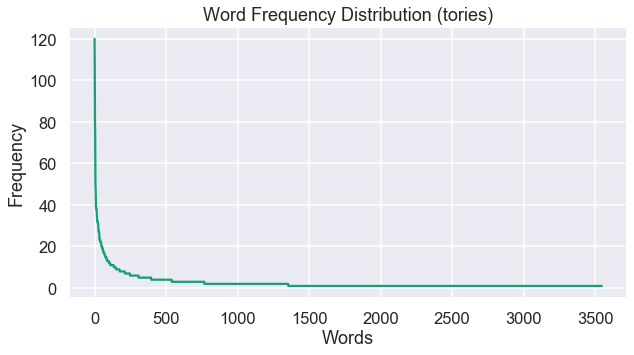

In [28]:
y_val = [x[1] for x in pos_freq_r.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (tories)")
plt.show()

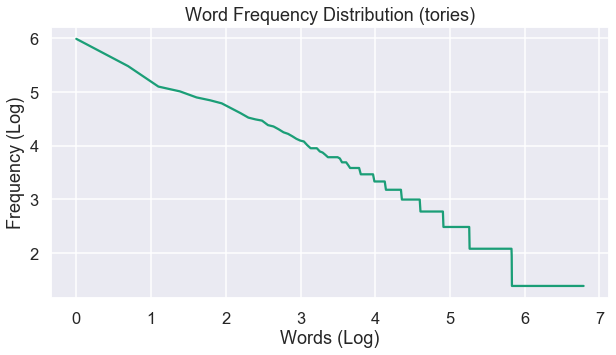

In [29]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (tories)")
plt.plot(x_val, y_final)
plt.show()

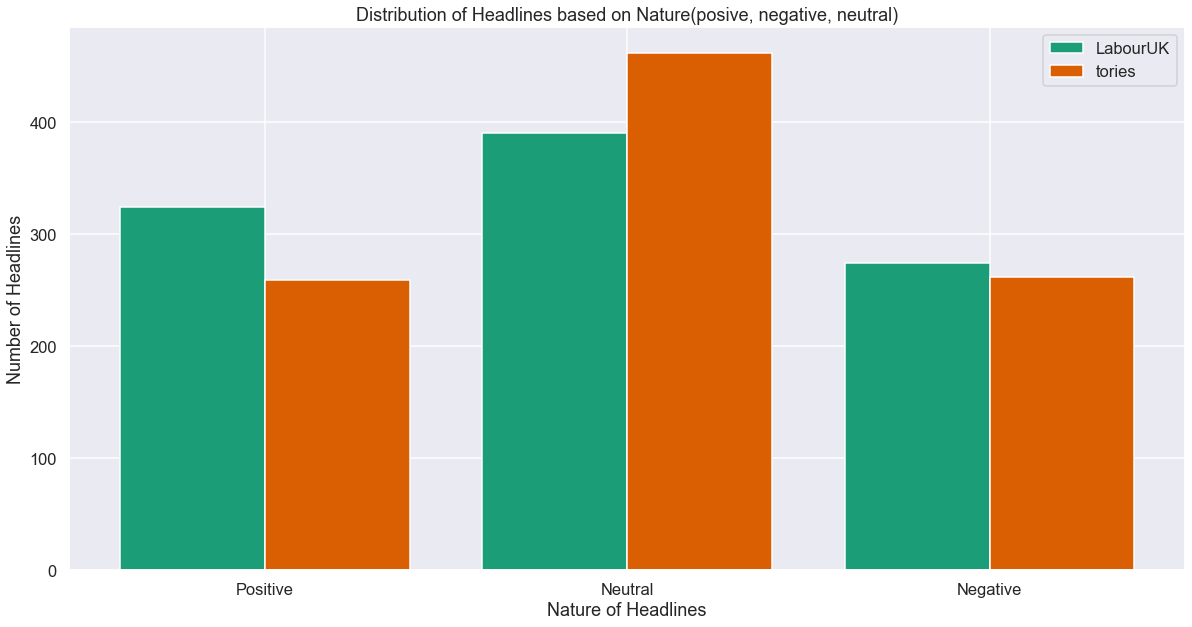

In [30]:
X_axis = np.arange(len(x))

plt.figure(figsize = (20,10))
plt.bar(X_axis - 0.2, count_lhl, 0.4, label = 'LabourUK')
plt.bar(X_axis + 0.2, count_rhl, 0.4, label = 'tories')
  
plt.xticks(X_axis, x)
plt.xlabel("Nature of Headlines")
plt.ylabel("Number of Headlines")
plt.title("Distribution of Headlines based on Nature(posive, negative, neutral)")
plt.legend()
plt.show()

In [31]:
import string
import re
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
df_dat

,headline,Nature,label
0,"""...a new in-depth military alliance made up o...",0,0
1,"""5 things to know about German conservatives’ ...",0,1
2,"""Ahmad"" is gay. He has spent 8 months in deten...",-1,0
3,"""Anas Sarwar - Loses Seats - ""Really turning t...",1,0
4,"""Anas Sarwar was Keir Starmer's choice for Sco...",0,0
...,...,...,...
1966,"🚨 | NEW: Joe Biden on Cuba: ""Communism is a fa...",-1,1
1967,🚨 | NEW: Sir Keir Starmer does not support a N...,-1,0
1968,🚨Exclusive Ethnic Minority Voting Intention Po...,0,1
1969,🚨Savanta ComRes NEW Westminster Voting Intenti...,0,0


In [33]:
from nltk.stem import WordNetLemmatizer as wnl
import nltk
nltk.download('wordnet')
stp = string.punctuation
nltk.download('stopwords')
# stp = "!”#$%&’()*+,-./:;<=>?@[]^_`{|}~\\"

def text_process(mess):
    nopunc = [char for char in mess if char not in stp]
    nopunc = "".join(nopunc)
    nostopword = [word for word in nopunc.split() if word not in stopwords.words("english")]
    return nostopword

def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

def clean_text1(text):
    text = str(text)
    words = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text)
    pattern = r"[\d]"
    words = re.sub(pattern, '', words)
    words = words.lower()
    final_words = [wnl().lemmatize(word) for word in words.split()]
    final_words = ' '.join(final_words)
    return final_words

df_dat['headline'] = df_dat['headline'].map(clean_text1)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/SaiKiran/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/SaiKiran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [34]:
df_dat

,headline,Nature,label
0,a new in depth military alliance made up of th...,0,0
1,thing to know about german conservative electi...,0,1
2,ahmad is gay he ha spent month in detention he...,-1,0
3,ana sarwar loses seat really turning thing aro...,1,0
4,ana sarwar wa keir starmer s choice for scotti...,0,0
...,...,...,...
1966,new joe biden on cuba communism is a failed sy...,-1,1
1967,new sir keir starmer doe not support a nationa...,-1,0
1968,exclusive ethnic minority voting intention pol...,0,1
1969,savanta comres new westminster voting intentio...,0,0


# As both the classes are equally balanced, no class balancing is required.

In [35]:
df_dat_train, df_dat_test = train_test_split(df_dat, test_size = 0.3)

In [36]:
abc = df_dat_train[df_dat_train['label']==0]

In [37]:
#Increasing the samples of LeftWingUK so as to manually class balance them.
#df_dat_train = pd.concat([df_dat_train,abc,abc,abc,abc,abc])

In [38]:
x_train = df_dat_train.iloc[:,[0,1]]
y_train = df_dat_train.iloc[:,-1]
x_test = df_dat_test.iloc[:,[0,1]]
y_test = df_dat_test.iloc[:,-1]
(x_train['Nature'].unique())

array([ 1, -1,  0])

In [39]:
#x_train, x_test, y_train, y_test = train_test_split(df_dat, df_dat['label'], test_size=0.33, random_state=42)
# print(x_train.shape)
# print(y_train.shape)
import pickle

tfidf_vectorizer = TfidfVectorizer()
train_tf_idf = tfidf_vectorizer.fit_transform(x_train['headline'])
test_tf_idf = tfidf_vectorizer.transform(x_test['headline'])

# Saving Vectorizer as a pickle file for later use for transforming at the time of prediction
vec_file = 'vectorizer.pkl'
pickle.dump(tfidf_vectorizer, open(vec_file, 'wb'))

In [40]:
#Selecting 5 models 
classifier1 = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)).fit(train_tf_idf, y_train) ### 0.79
classifier2 = MultinomialNB().fit(train_tf_idf, y_train)
classifier3 = svm.SVC(probability = True).fit(train_tf_idf, y_train)
classifier4 = LogisticRegression().fit(train_tf_idf, y_train)
classifier5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 20).fit(train_tf_idf, y_train)

In [41]:
# Prediction on test data with 5 models
y_pred1 = classifier1.predict(test_tf_idf)
y_pred2 = classifier2.predict(test_tf_idf)
y_pred3 = classifier3.predict(test_tf_idf)
y_pred4 = classifier4.predict(test_tf_idf)
y_pred5 = classifier5.predict(test_tf_idf)

In [42]:
y_test

108     1
846     0
1403    0
1243    1
908     0
       ..
1751    1
481     0
1335    1
1284    0
962     1
Name: label, Length: 592, dtype: int64

In [43]:
predictions = [y_pred1, y_pred2, y_pred3, y_pred4, y_pred5]
accuracy = pd.DataFrame(np.array([[accuracy_score(y_test, i) for i in predictions]]), columns=['OneVRest', 'Navie Bayes', 'SVM', 'Logistic Regression', 'Decision Tree'] )

# Misclassifications based on actual y_test
print('Mis classifictations OneVRest ' + str(np.sum(y_pred1 != y_test)))
# print(metrics.classification_report(news_test.target, y_pred, target_names=news_test.target_names)),
print(metrics.confusion_matrix(y_test, y_pred1))

# Misclassifications based on actual y_test
print('Mis classifictations Naive-Bayes ' + str(np.sum(y_pred2 != y_test)))
# print(metrics.classification_report(news_test.target, y_pred, target_names=news_test.target_names)),
print(metrics.confusion_matrix(y_test, y_pred2))


# Misclassifications based on actual y_test
print('Mis classifictations SVM ' + str(np.sum(y_pred3 != y_test)))
# print(metrics.classification_report(news_test.target, y_pred, target_names=news_test.target_names)),
print(metrics.confusion_matrix(y_test, y_pred3))


# Misclassifications based on actual y_test
print('Mis classifictations Logistic-Regression ' + str(np.sum(y_pred4 != y_test)))
# print(metrics.classification_report(news_test.target, y_pred, target_names=news_test.target_names)),
print(metrics.confusion_matrix(y_test, y_pred4))


# Misclassifications based on actual y_test
print('Mis classifictations Decision-Tree-Classifier ' + str(np.sum(y_pred5 != y_test)))
# print(metrics.classification_report(news_test.target, y_pred, target_names=news_test.target_names)),
print(metrics.confusion_matrix(y_test, y_pred5))

accuracy

Mis classifictations OneVRest 179
[[234  58]
 [121 179]]
Mis classifictations Naive-Bayes 179
[[234  58]
 [121 179]]
Mis classifictations SVM 173
[[208  84]
 [ 89 211]]
Mis classifictations Logistic-Regression 171
[[216  76]
 [ 95 205]]
Mis classifictations Decision-Tree-Classifier 205
[[145 147]
 [ 58 242]]


,OneVRest,Navie Bayes,SVM,Logistic Regression,Decision Tree
0,0.697635,0.697635,0.70777,0.711149,0.653716


In [44]:
probs1 = classifier1.predict_proba(test_tf_idf)
#print(probs)
preds1 = probs1[:,1]
#print(preds)
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

probs2 = classifier1.predict_proba(test_tf_idf)
#print(probs)
preds2 = probs2[:,1]
#print(preds)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)

probs3 = classifier3.predict_proba(test_tf_idf)
#print(probs)
preds3 = probs3[:,1]
#print(preds)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, preds3)
roc_auc3 = metrics.auc(fpr3, tpr3)

probs4 = classifier4.predict_proba(test_tf_idf)
#print(probs)
preds4 = probs4[:,1]
#print(preds)
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, preds4)
roc_auc4 = metrics.auc(fpr4, tpr4)

probs5 = classifier5.predict_proba(test_tf_idf)
#print(probs)
preds5 = probs5[:,1]
#print(preds)
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test, preds5)
roc_auc5 = metrics.auc(fpr5, tpr5)


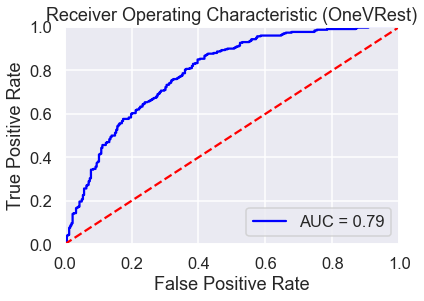

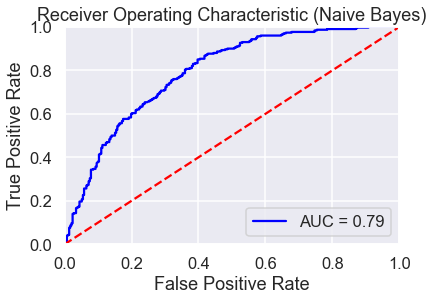

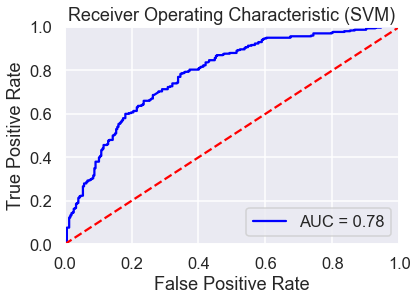

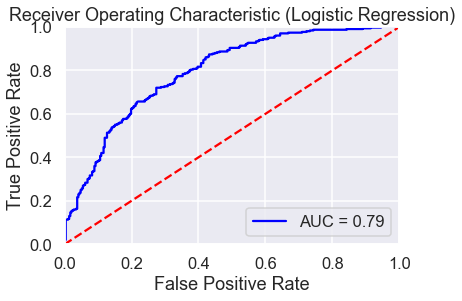

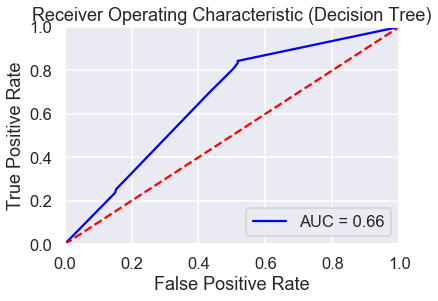

In [45]:
plt.title('Receiver Operating Characteristic (OneVRest)')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('Receiver Operating Characteristic (Naive Bayes)')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('Receiver Operating Characteristic (SVM)')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


plt.title('Receiver Operating Characteristic (Logistic Regression)')
plt.plot(fpr4, tpr4, 'b', label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.plot(fpr5, tpr5, 'b', label = 'AUC = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
# Saving model as a pickle file for later use for prediction
pickle.dump(classifier3, open('red.pkl', 'wb'))